# <font style="color:rgb(50,120,229)">Median Filter</font>

Median blur filtering is a nonlinear filtering technique that is most commonly used to remove **salt-and-pepper** noise from images. As the name suggests, salt-and-pepper noise shows up as randomly occurring white and black pixels that are sharply different from the surrounding. In color images, salt-and-pepper noise may appear as small random color spots. 

The illustration below shows three images.The image on the left is the noisy image that we wish to filter. In the center, we show the image filtered using a Gaussian filter and on the right, we show the image filtered using a Median Filter. Clearly, median blur filter performs better on salt-and-pepper noise.

| <center><img src = "https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w2-m3.1-original.png"/></center>  |<center><img src = "https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w2-m3.1-GaussianBulrsigma5.png"/></center> | <center><img src = "https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w2-m3.1-MedianBlurimage.png"/></center> |
| -------- | -------- | -------- |
| <center>Original Image</center>     | <center>Gaussian blur with sigma 5</center> | <center>Median Blur Filter </center>     |

In OpenCV’s implementation of the median blur, a square kernel is used. The dimension of the square must be an odd integer greater than 1. For an image, the median blurring filter replaces the value of the central pixel with the median of all the pixels within the kernel area. As you can imagine, in median filtering, the filtered value at any pixel is one of the pixel values in its neighbourhood specified by the kernel.

Let’s see how median filtering removes salt-and-pepper noise. Consider a 3x3 patch in a grayscale image as shown below. 

$$
\begin{bmatrix}
30 & 32 & 29\\
31 & 255 & 35\\
35 & 30 & 33
\end{bmatrix}
$$

Notice, the value at the center pixel is way higher than the neighbors. It is likely that the center pixel is corrupted with salt-and-pepper noise.

**If we use a box filter to remove this noise,** the center pixel will be the average of all pixels in the 3x3 neighborhood. The center pixel value after box filtering will be 

$$\frac{30 + 32 + 29 + 31 + 255 + 35 + 35 + 30 + 33}{9} = 57$$

$$
\begin{bmatrix}
30 & 32 & 29\\
31 & 57 & 35\\
35 & 30 & 33
\end{bmatrix}
$$


Which is better than before, but still high compared to the neighboring pixels. 

Now, let’s use a median filter. The median filter takes in only the pixel values in the neighbourhood of the central pixel, sorts the list of values and then replaces the value of the central pixel with the median value of the sorted list. In this case, the sorted list becomes 

$$[29, 30, 30, 31, 32, 33, 35, 35, 255]$$

Thus, the median value is 32, and we replace the central pixel with 32. Voila! The noise is gone.
$$
\begin{bmatrix}
30 & 32 & 29\\
31 & 32 & 35\\
35 & 30 & 33
\end{bmatrix}
$$

This is repeated for each pixel of the image.

## <font style="color:rgb(50,120,229)">Median Blur in OpenCV</font>

Median blur is implemented using the function [**`medianBlur`**](https://docs.opencv.org/4.1.0/d4/d86/group__imgproc__filter.html#ga564869aa33e58769b4469101aac458f9) in OpenCV. Its usage is straightforward. 

### <font style="color:rgb(8,133,37)">Function Syntax</font>

```python
dst	=	cv2.medianBlur(	src, ksize[, dst]	)
```

**Parameters**
- **`src`**	input 1-, 3-, or 4-channel image; when ksize is 3 or 5, the image depth should be CV_8U, CV_16U, or CV_32F, for larger aperture sizes, it can only be CV_8U.
- **`dst`**	destination array of the same size and type as src.
- **`ksize`**	aperture linear size; it must be odd and greater than 1, for example: 3, 5,7, ...

Time to look at some code in action!

In [2]:
import cv2
import numpy as np
from dataPath import DATA_PATH

In [3]:
filename = DATA_PATH + "images/salt-and-pepper.png"

img = cv2.imread(filename)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

Apply Median Blurring. First, we define a kernel of size 5. Then we perform median blurring using the `cv2.medianBlur` function and store it in numpy array `medianBlurred`

Text(0.5, 1.0, 'Median Blur Result : KernelSize = 5')

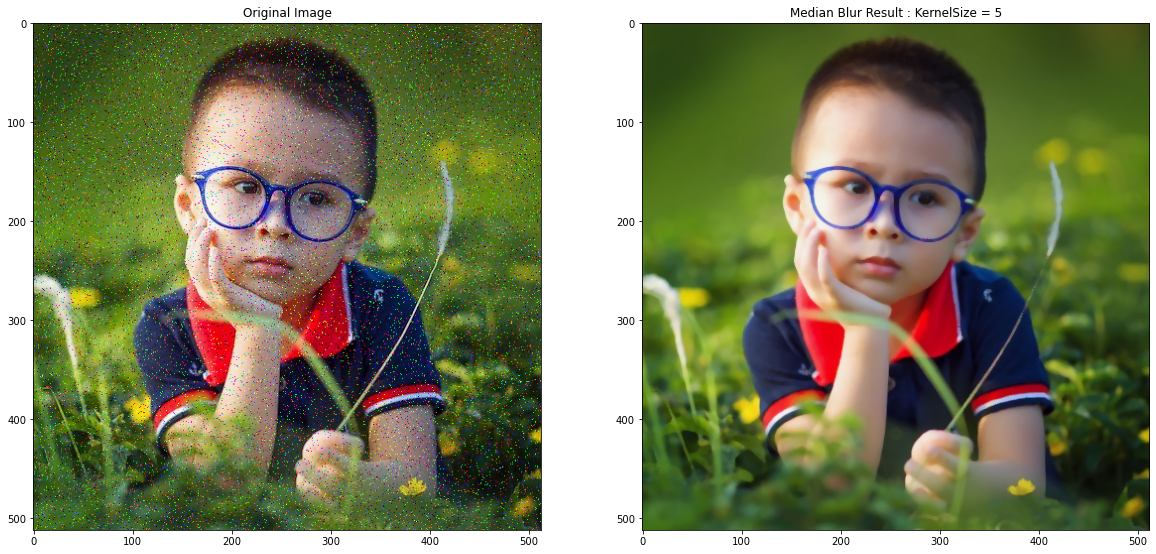

In [6]:
# Defining the kernel size
kernelSize = 5

# Performing Median Blurring and store it in numpy array "medianBlurred"
medianBlurred = cv2.medianBlur(img,kernelSize)

# Display the original and median blurred image
plt.figure(figsize=[20,10])
plt.subplot(121);plt.imshow(img[...,::-1]);plt.title("Original Image")
plt.subplot(122);plt.imshow(medianBlurred[...,::-1]);plt.title("Median Blur Result : KernelSize = 5")